# Librerías

In [ ]:
from google.colab import drive  #Para enlazar a Drive
import pandas as pd             #Para manejar la base de datos
import glob, os                 #Para leer archivos de drive
import datetime                 #Para manejar fechas
import numpy as np
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})

In [1]:
path = 'drive/MyDrive/IPC Bienes/Consolidados/'
productos = ['Celulares',
             'TV',
             'Impresora',
             'Lavadora - Secadora',
             'Computador', 
             'Refrigerador'
             ]
db_productos = {}
for producto in productos:
  db={}
  i=1
  for filename in glob.glob(os.path.join(path+producto+'/Scrapers', '*.csv')):
    print(filename)
    x = pd.read_csv(filename, encoding='utf-8', parse_dates=True)
    x = x[~x.Modelo.str.contains(" \+")]
    db[i] = x
  db_productos[producto] = pd.concat(db.values())
  #df.to_csv('drive/MyDrive/IPC Bienes/'+producto+'.csv', index=False)

NameError: ignored

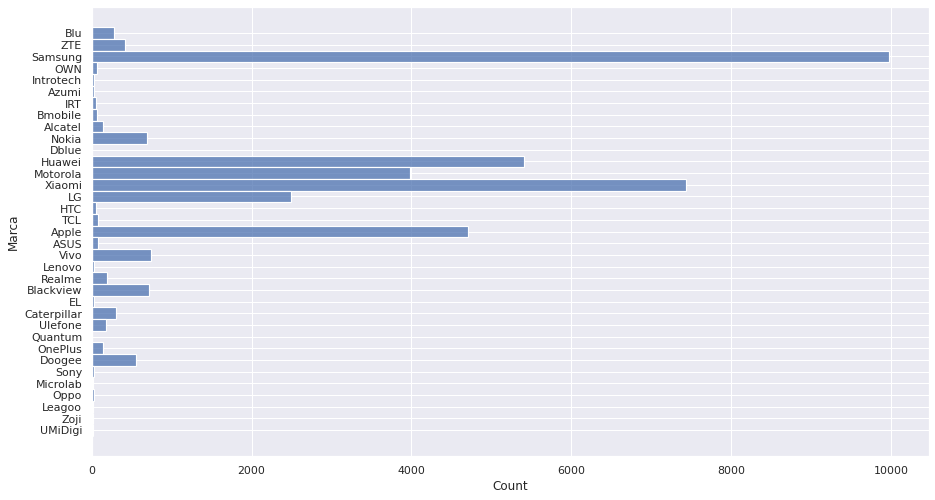

In [ ]:
sns.histplot(data=db_productos['Celulares'], y='Marca')

In [ ]:
tiendas = ['Falabella', 'Paris', 'Ripley']
marcas = ['Samsung','Huawei','Motorola','Xiaomi','LG','Apple']

In [ ]:
cel = db_productos['Celulares']
cel = cel[cel['Marca'].isin(marcas)]
cel = cel[cel['Tienda'].isin(tiendas)]

In [ ]:
cel = cel[['Marca', 'Modelo', 'Tienda', 'Precio Normal', 'Fecha']]

In [ ]:
cel

,Marca,Modelo,Tienda,Precio Normal,Fecha
20,Samsung,Galaxy A01 (A015 / 32 GB / 2 GB / Black),Paris,74990,2021-04-05
21,Samsung,Galaxy A01 (A015 / 32 GB / 2 GB / Black),Paris,89990,2021-04-05
22,Samsung,Galaxy A01 (A015 / 32 GB / 2 GB / Black),Paris,99990,2021-04-05
23,Samsung,Galaxy A01 (A015 / 32 GB / 2 GB / Black),Paris,94990,2021-04-05
27,Samsung,Galaxy A01 (A015 / 32 GB / 2 GB / Black),Falabella,84990,2021-04-05
...,...,...,...,...,...
44265,Samsung,Galaxy S21 Ultra 5G (G998 / 256 GB / 12 GB / P...,Falabella,1249990,2021-04-30
44267,Samsung,Galaxy S21 Ultra 5G (G998 / 256 GB / 12 GB / P...,Paris,1249990,2021-04-30
44269,Samsung,Galaxy S21 Ultra 5G (G998 / 256 GB / 12 GB / P...,Ripley,1499990,2021-04-30
44289,Apple,iPhone 12 Pro Max (256 GB / Graphite),Falabella,1349990,2021-04-30


In [ ]:
def pct_diff(dataframe, dia_string):
  df = dataframe.copy()
  df = df[df['Fecha'] >= dia_string]

  df['id'] = df['Tienda'] + '---' + df['Modelo'] + '---' + df['Marca']

  df.sort_values(by=['id', 'Fecha'], inplace=True)
  df.reset_index(inplace=True, drop=True)
  
  modelo_base = df['id'][0]
  base = df['Precio Normal'][0]
  df['pct_diff'] = 0

  for i, row in df.iterrows():
    if row['id'] == modelo_base:
      df.at[i, 'pct_diff'] = (row['Precio Normal'] - base)*100/base
    else:
      modelo_base = row['id']
      base = row['Precio Normal']
      continue
  df.drop('id', axis=1, inplace=True)

  df3 = df[
         (df['pct_diff']<=100)
         & (df['pct_diff']>=-100)]
  df3.sort_values(by=['Fecha'], inplace=True)
  return df3

In [ ]:
cel_dif = pct_diff(cel, '2021-04-05')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = cel.copy()
db = {}
for id in df['id'].unique():
  x = df[df['id'] == id]
  x = x.groupby(by=['Tienda', 'Modelo', 'Marca', 'Fecha'], as_index=False).mean()
  x.sort_values(by=['Tienda', 'Modelo', 'Marca', 'Fecha'], inplace=True)
  x.reset_index(inplace=True, drop=True)

  base = x['Precio Normal'][0]

  x['pct_diff'] = (x['Precio Normal']- base)*100/base

  x = x.groupby(by=['Modelo', 'Marca', 'Fecha'], as_index=False).mean()
  x.sort_values(by=['Modelo', 'Marca', 'Fecha'], inplace=True)
  x.reset_index(inplace=True, drop=True)
  db[id2] = x

KeyError: ignored

In [ ]:
xd = pd.concat(db.values())
xd.sort_values(by='Fecha', inplace=True)

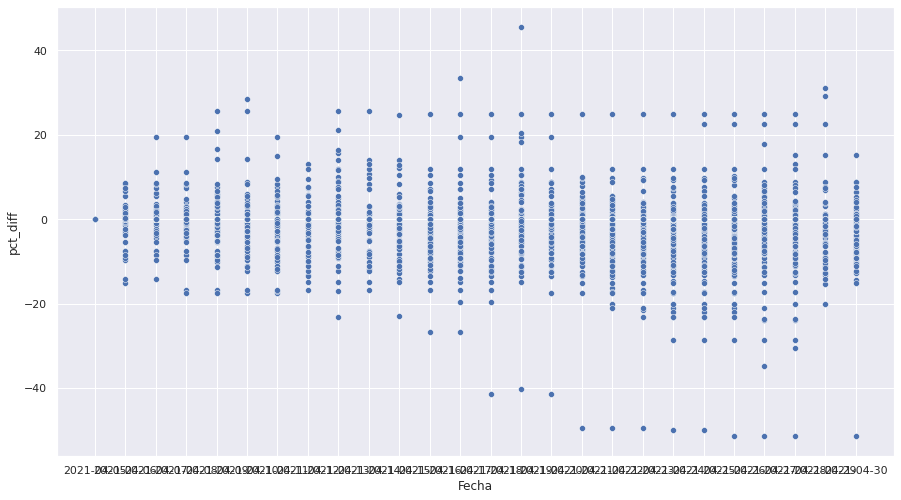

In [ ]:
sns.scatterplot(data=xd, x='Fecha', y='pct_diff')

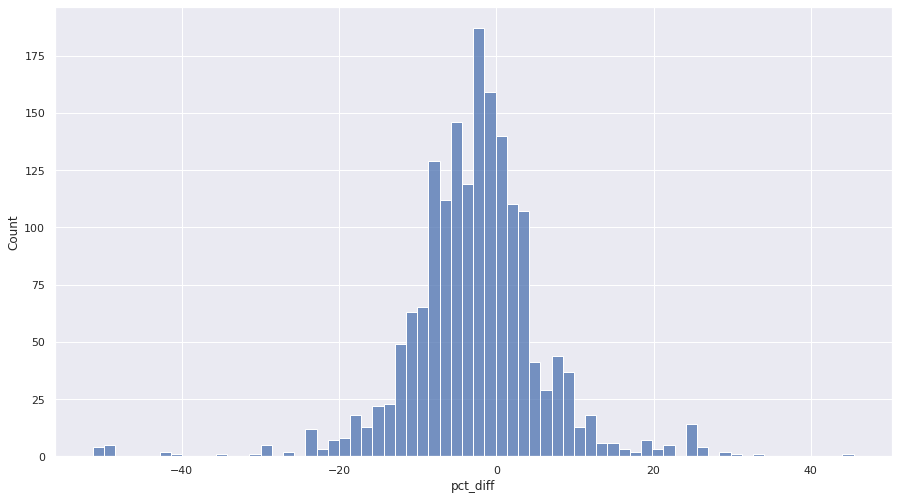

In [ ]:
sns.histplot(data=xd[xd['pct_diff']!=0], x='pct_diff')

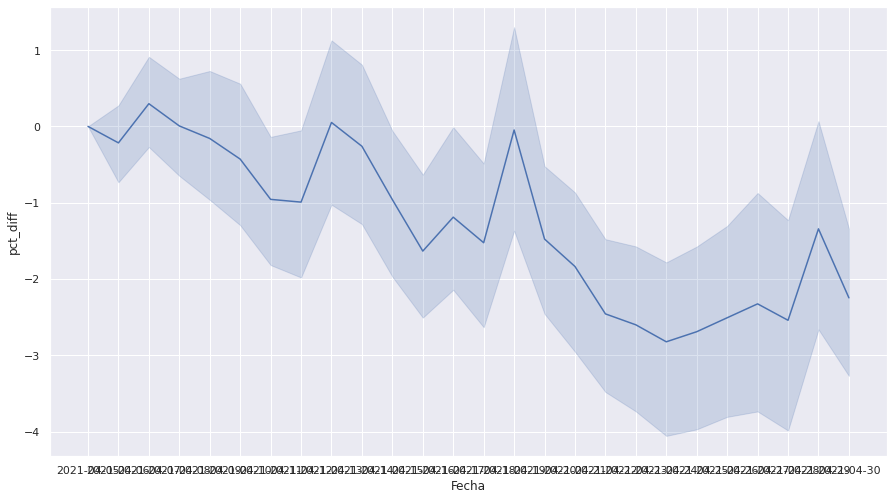

In [ ]:
sns.lineplot(data=xd, x='Fecha', y='pct_diff', sort=True)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

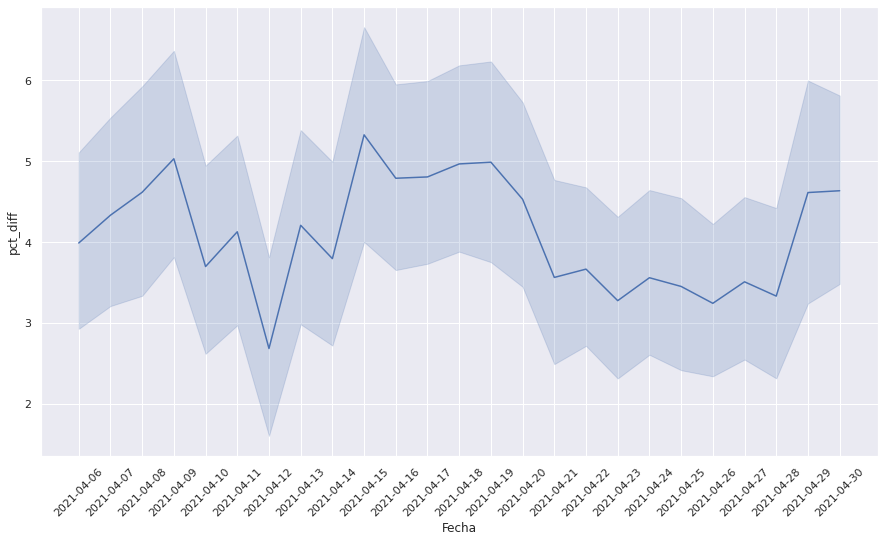

In [ ]:
df4 = db_diff[p].groupby('Fecha', axis=0, as_index=False).mean()
fig, ax = plt.subplots()

sns.lineplot(data=db_diff[p], x='Fecha', y='pct_diff', sort=True, ax=ax)
sns.lineplot(data=df4, x='Fecha', y='pct_diff', ax=ax, color='darkblue', marker="o")
plt.xticks(rotation=45)
plt.title(p)

for x, y in zip(df4['Fecha'], df4['pct_diff']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y+0.3, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.2f}'.format(y), # data label, formatted to ignore decimals
    color = 'white').set_backgroundcolor('#154360') # set colour of line
  
  plt.show()

# Preprocesamiento

Eliminamos lo "packs" de productos:

In [ ]:
def preprocesamiento(df, producto):
  temporal = df[producto]
  #temporal = temporal[temporal['Tienda']!='Linio Chile']
  temporal = temporal[temporal['Tienda'].isin(['Falabella', 'Paris', 'Ripley'])]
  temporal = temporal[~temporal.Modelo.str.contains(" \+")]
  temp2 = temporal.groupby(['Modelo', 'Marca', 'Tienda', 'Fecha'], as_index=False).mean()
  sns.countplot(y = 'Tienda',
              data = temp2,
              order = temp2['Tienda'].value_counts().index)
  plt.show()

  time.sleep(3)
  n_tiendas = input("¿Hasta que tienda debemos considerar?: ")
  order = temp2['Tienda'].value_counts().index
  order = order[:int(n_tiendas)]
  temp3 = temp2[temp2['Tienda'].isin(order)]

  p = sns.histplot(data=temp3, x='Precio Normal', kde=True)
  plt.show()

  time.sleep(3)
  precio_limite = input("¿Hasta que precio debemos considerar?: ")
  temp4 = temp3[temp3['Precio Normal'] <= int(precio_limite)]

  p = sns.histplot(data=temp4, x='Precio Normal', kde=True)
  plt.show()
  return temp4

In [ ]:
db = dict(zip(productos, [0] * len(productos)))

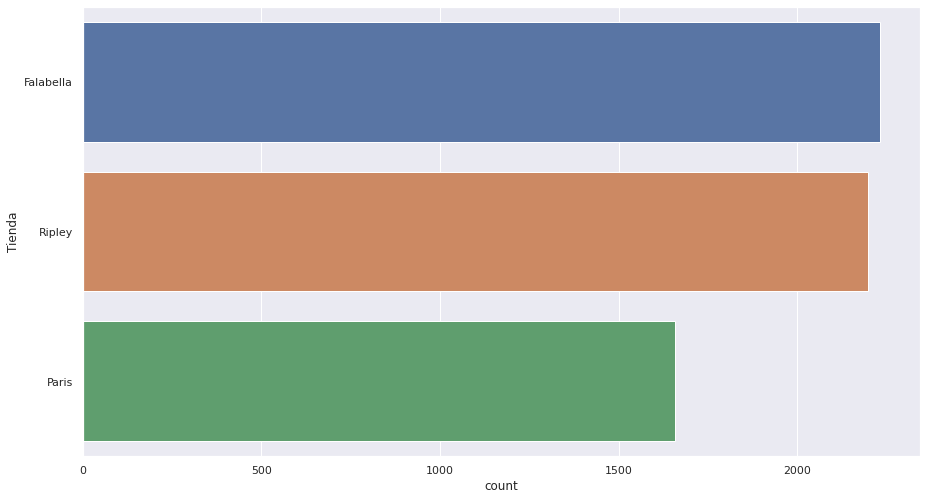

¿Hasta que tienda debemos considerar?: 3


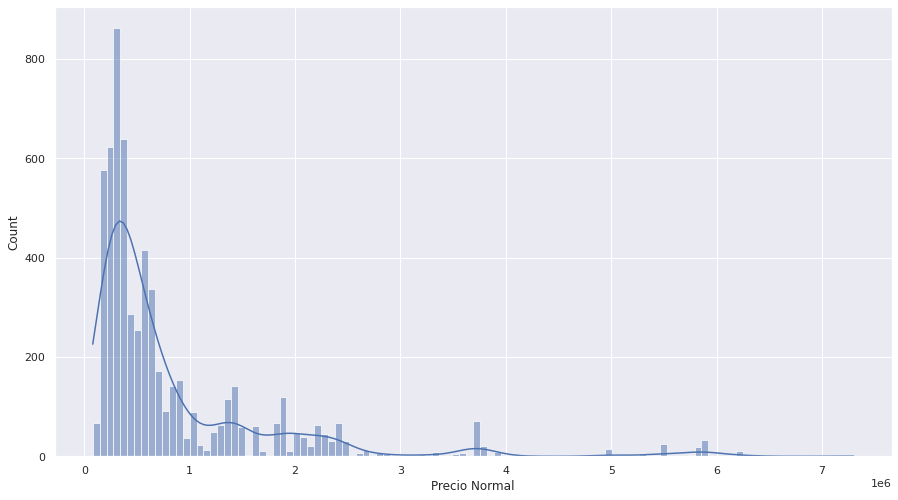

¿Hasta que precio debemos considerar?: 1000000


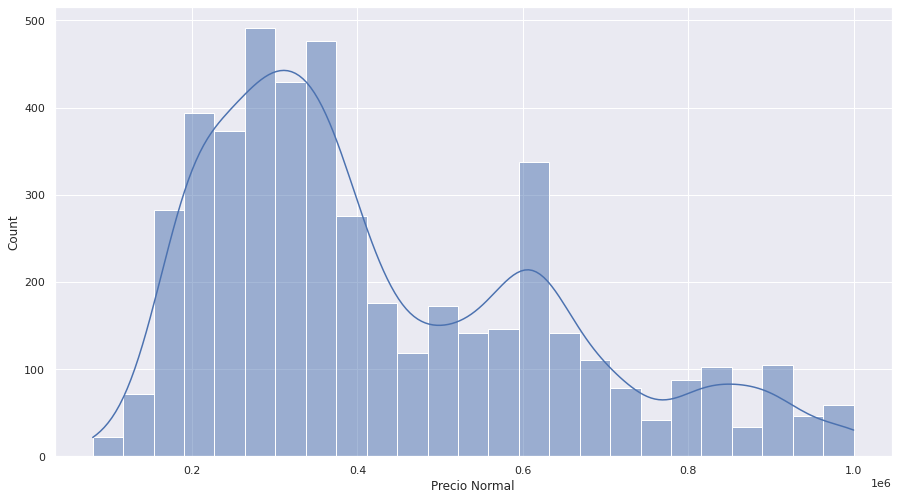

In [ ]:
db['TV'] = preprocesamiento(db_productos, 'TV')

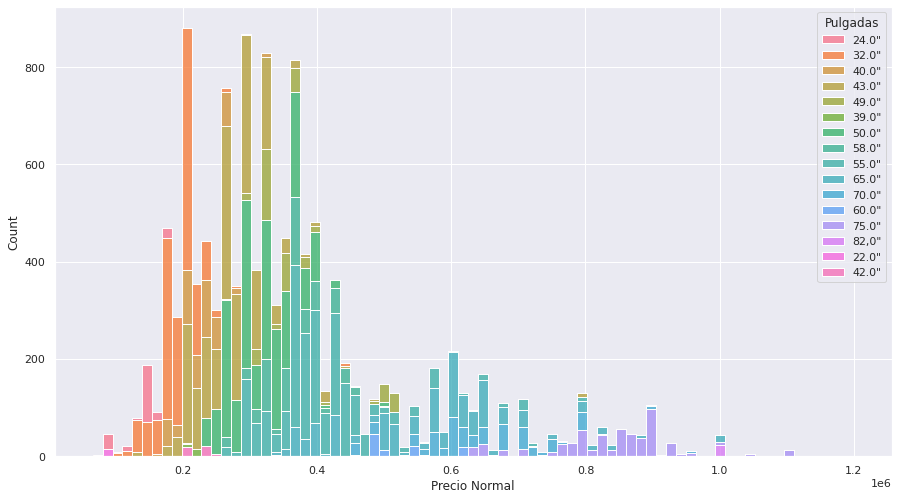

In [ ]:
tv = db_productos['TV']
tv = tv[(tv['Precio Normal']<1200000) & (tv['Pulgadas']!='No') & (tv['LED'] == 'LED')]
sns.histplot(x='Precio Normal', data=tv, hue='Pulgadas', multiple="stack")

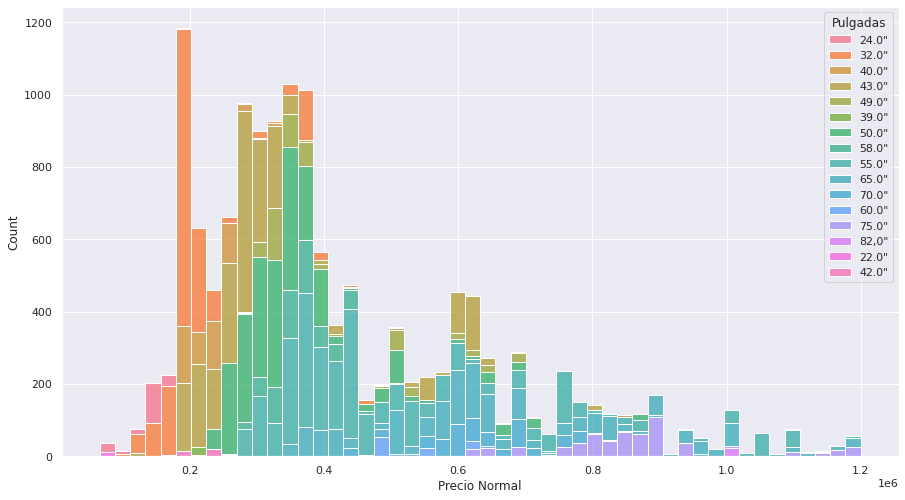

In [ ]:
tv = db_productos['TV']
tv = tv[(tv['Precio Normal']<1200000) & (tv['Pulgadas']!='No')]
sns.histplot(x='Precio Normal', data=tv, hue='Pulgadas', multiple="stack")

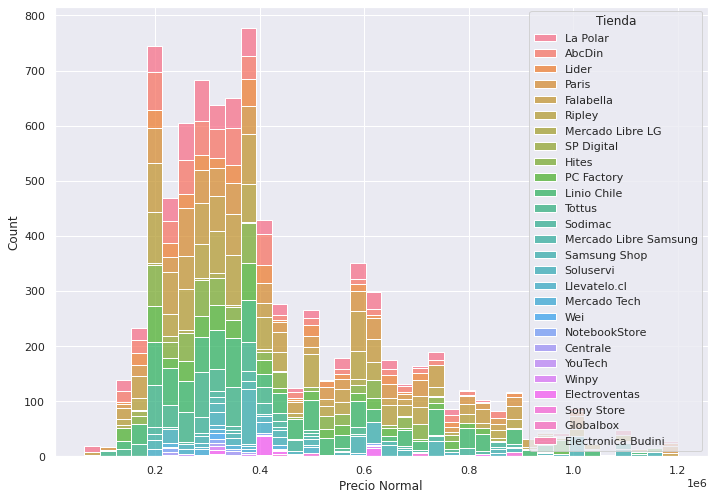

In [ ]:
tv = db_productos['TV']
tv = tv[(tv['Precio Normal']<1200000) & (tv['Pulgadas']!='No')]
sns.histplot(x='Precio Normal', data=tv, hue='Tienda', multiple="stack")

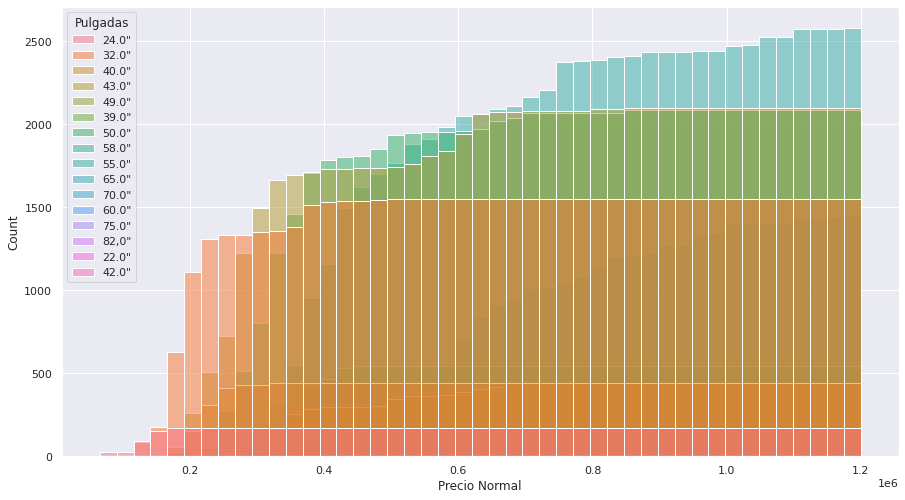

In [ ]:
tv = db_productos['TV']
tv = tv[(tv['Precio Normal']<1200000) & (tv['Pulgadas']!='No')]
sns.histplot(x='Precio Normal', data=tv, hue='Pulgadas', cumulative=True)

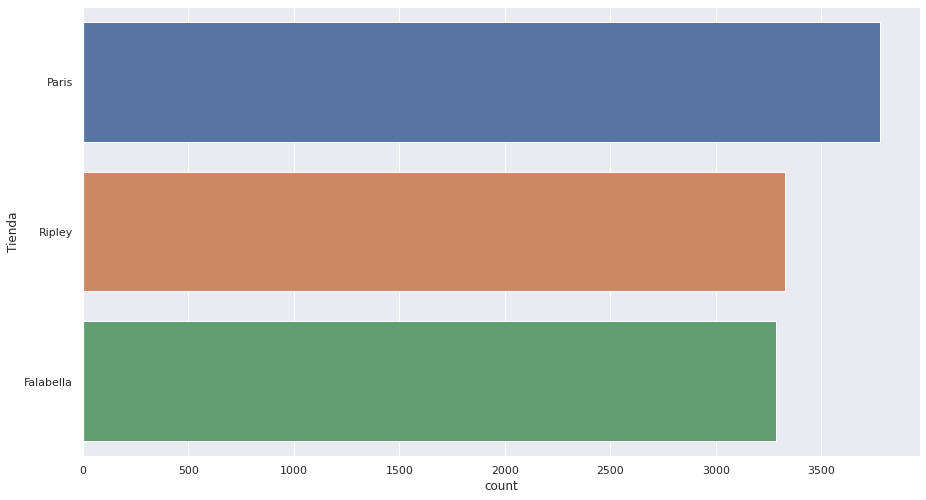

¿Hasta que tienda debemos considerar?: 3


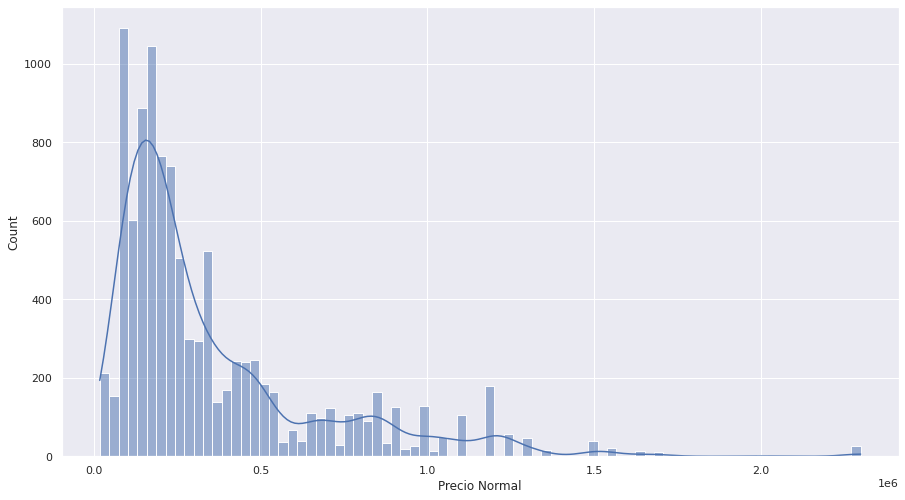

¿Hasta que precio debemos considerar?: 1500000


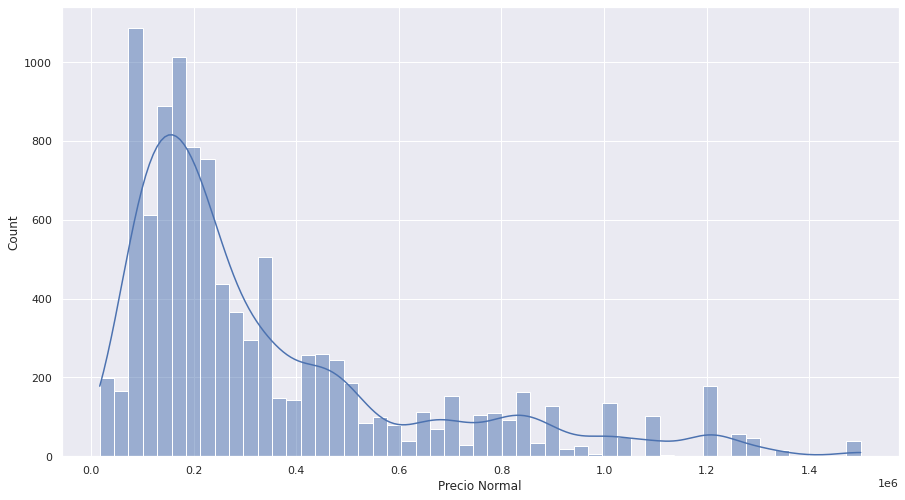

In [ ]:
db['Celulares'] = preprocesamiento(db_productos, 'Celulares')

In [ ]:
db['Computador'][]

,Modelo,Marca,Tienda,Fecha,Precio Normal
0,13-BA0103LA [22L86LA],HP,Ripley,2021-03-26,899990.0
1,13-BA0103LA [22L86LA],HP,Ripley,2021-03-27,899990.0
2,13-BA0103LA [22L86LA],HP,Ripley,2021-04-26,899990.0
3,13-BA0103LA [22L86LA],HP,Ripley,2021-04-28,899990.0
4,13-BA0103LA [22L86LA],HP,Ripley,2021-04-29,899990.0
...,...,...,...,...,...
24083,Zenbook UX435EG-AI095TS,ASUS,Paris,2021-03-31,1199990.0
24084,Zenbook UX435EG-AI095TS,ASUS,Paris,2021-04-01,1199990.0
24085,Zenbook UX435EG-AI095TS,ASUS,Paris,2021-04-02,1199990.0
24086,Zenbook UX435EG-AI095TS,ASUS,Paris,2021-04-04,1199990.0


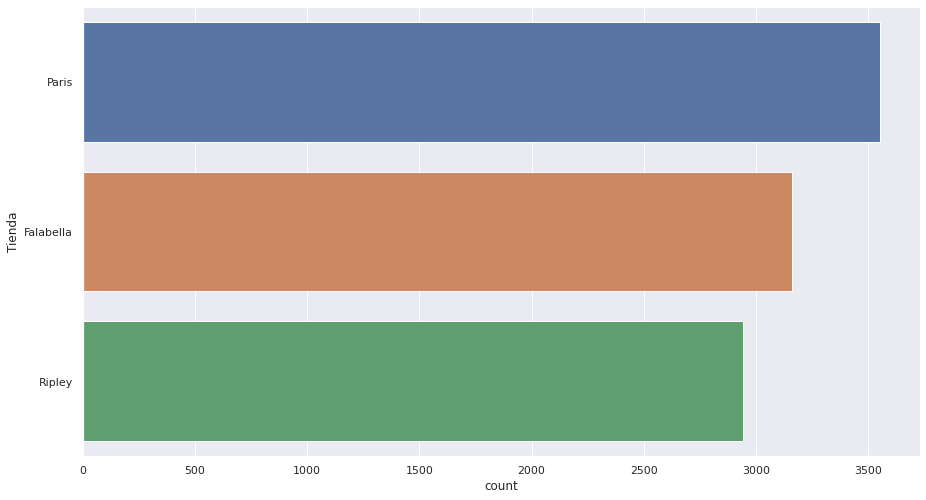

¿Hasta que tienda debemos considerar?: 3


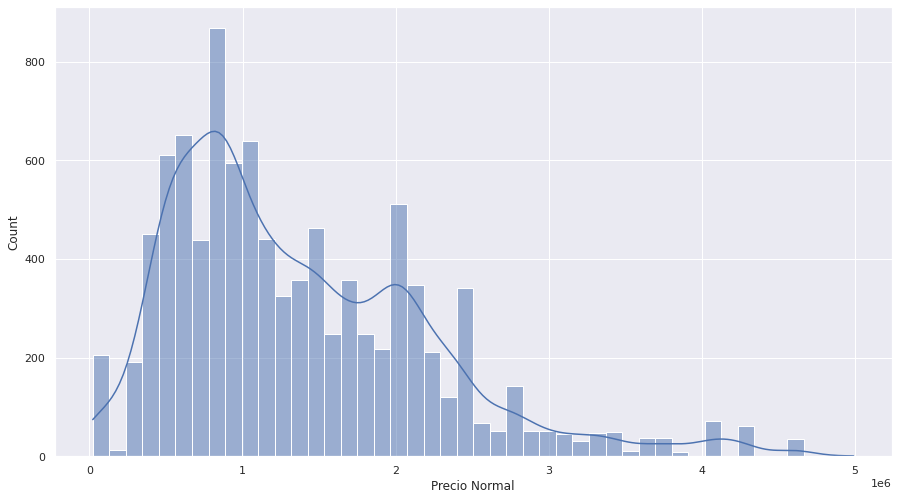

¿Hasta que precio debemos considerar?: 3000000


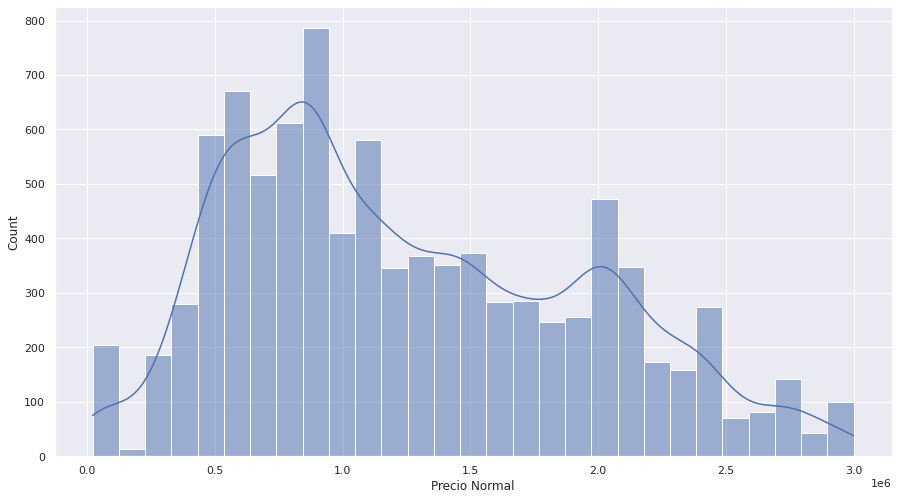

In [ ]:
db['Computador'] = preprocesamiento(db_productos, 'Computador')

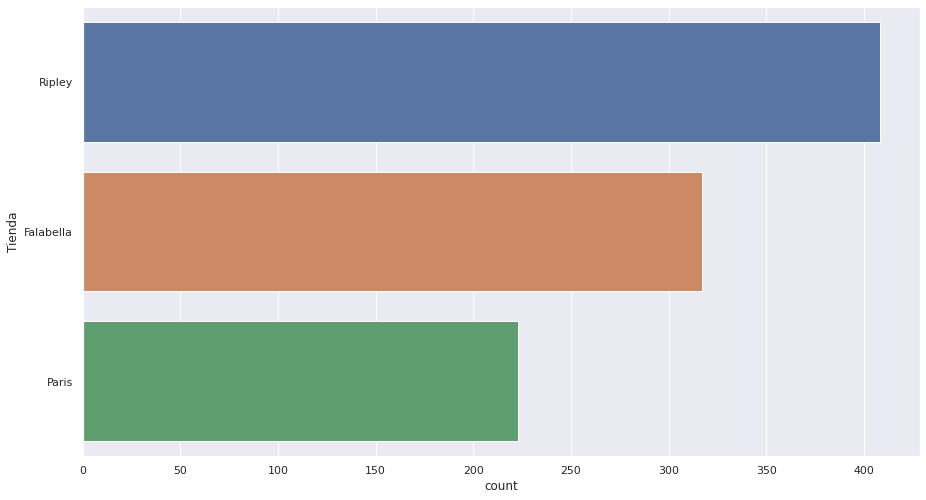

¿Hasta que tienda debemos considerar?: 3


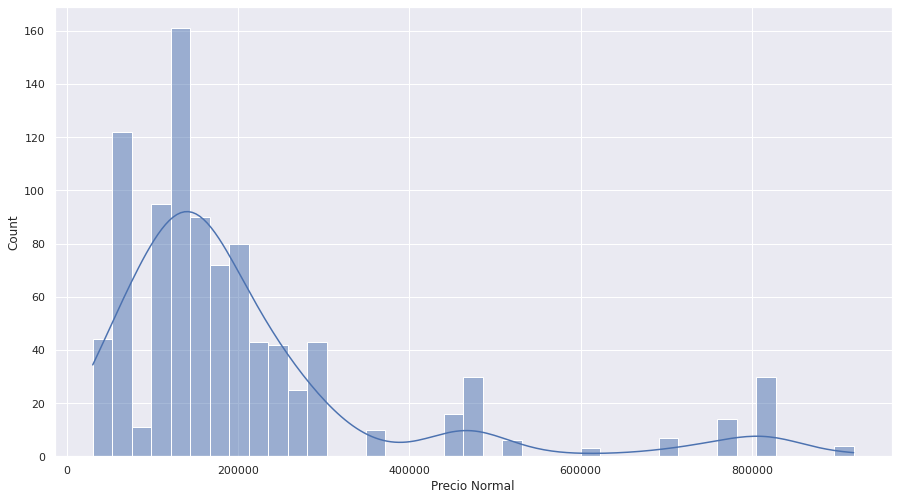

¿Hasta que precio debemos considerar?: 400000


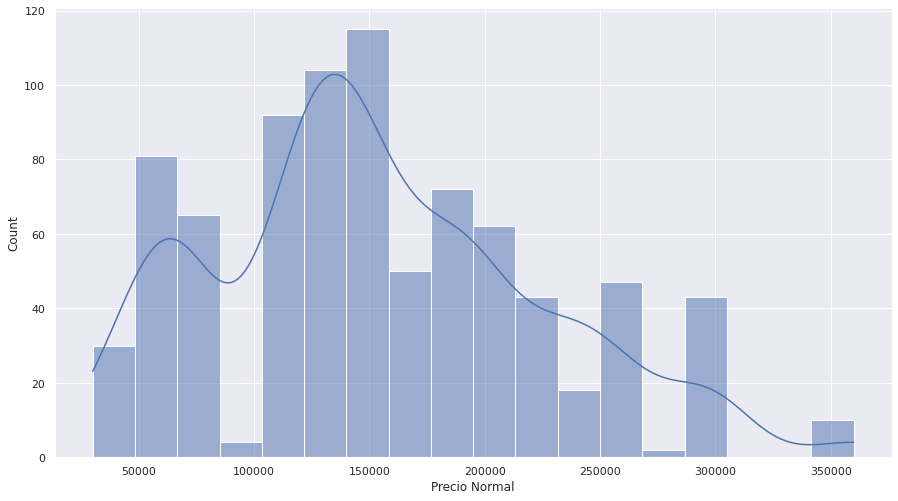

In [ ]:
db['Impresora'] = preprocesamiento(db_productos, 'Impresora')

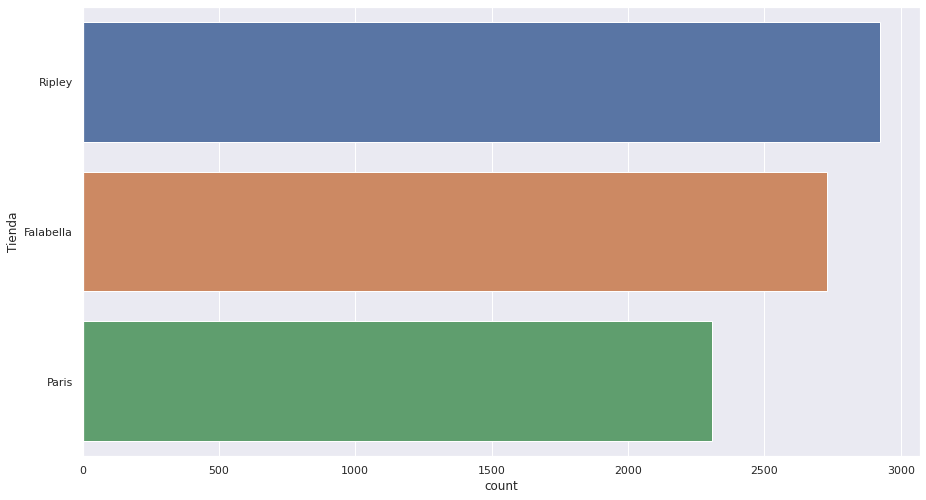

¿Hasta que tienda debemos considerar?: 3


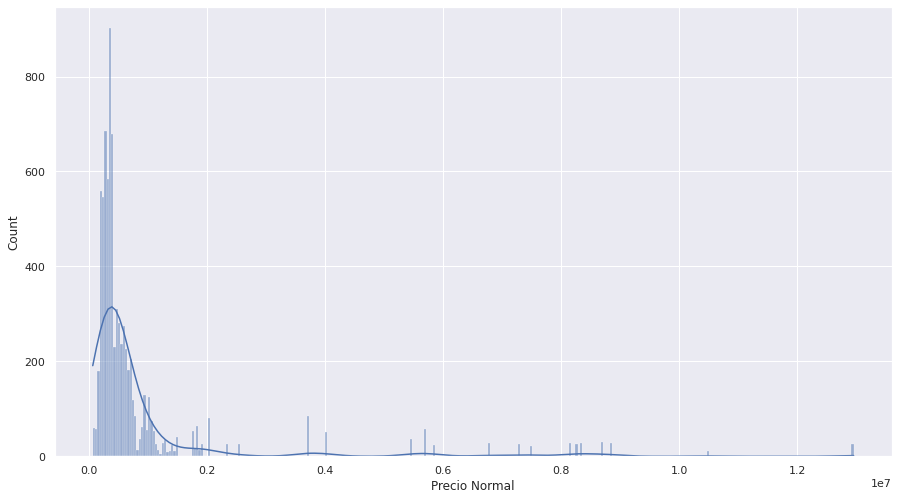

¿Hasta que precio debemos considerar?: 2000000


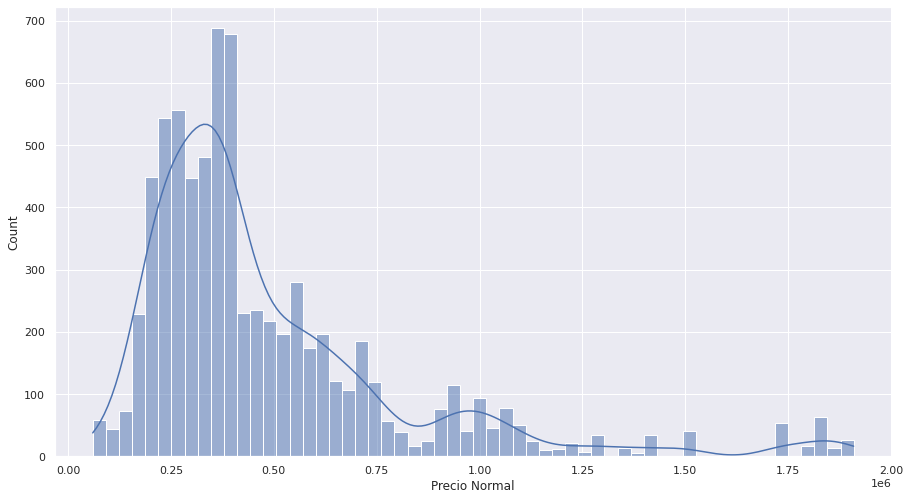

In [ ]:
db['Lavadora - Secadora'] = preprocesamiento(db_productos, 'Lavadora - Secadora')

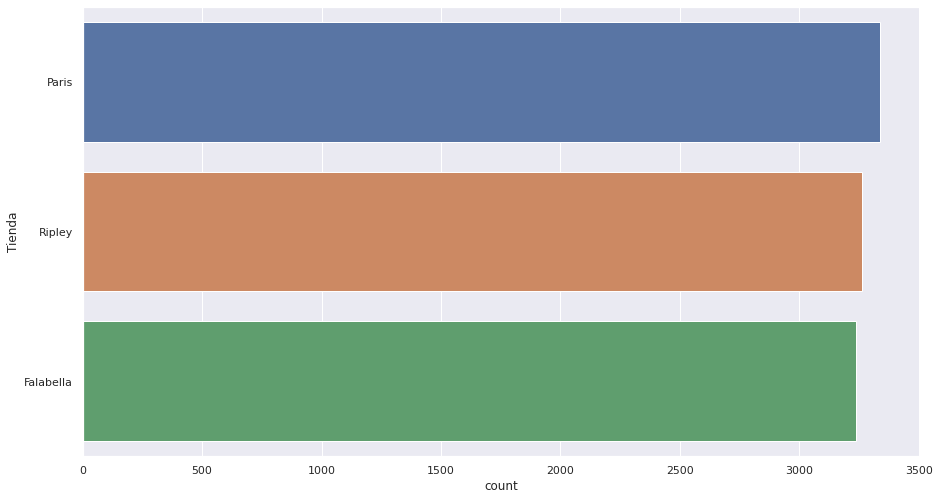

¿Hasta que tienda debemos considerar?: 3


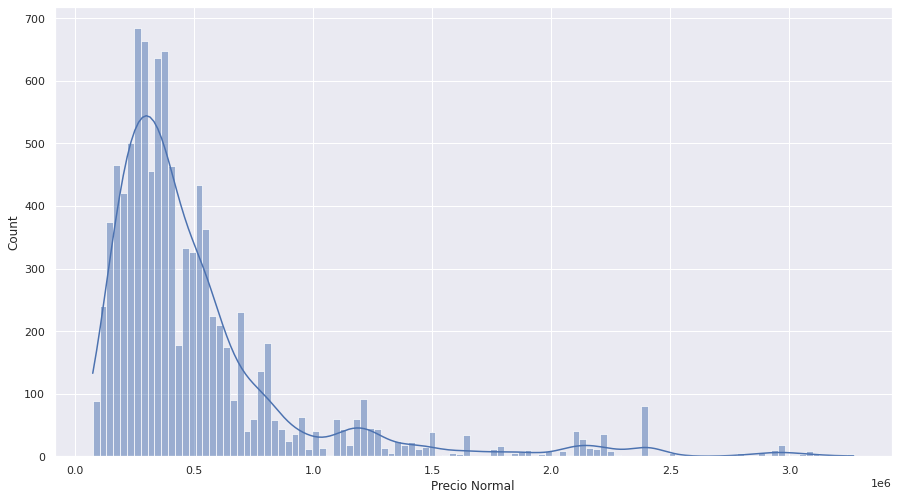

¿Hasta que precio debemos considerar?: 1000000


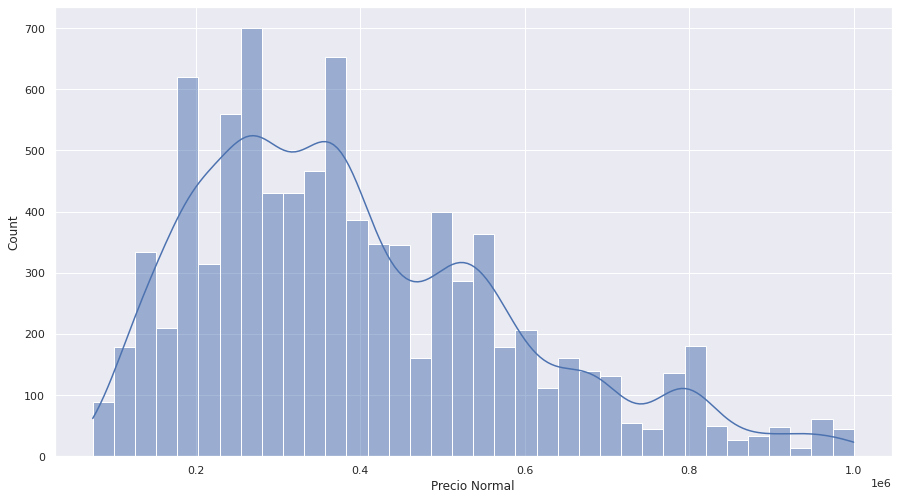

In [ ]:
db['Refrigerador'] = preprocesamiento(db_productos, 'Refrigerador')

Calculamos la variación con respecto al primer día:

In [ ]:
def pct_diff(dataframe, dia_string):
  df = dataframe.copy()
  df = df[df['Fecha'] >= dia_string]

  df.reset_index(inplace=True, drop=True)
  
  df['id'] = df['Tienda'] + '---' + df['Modelo'] + '---' + df['Marca']
  modelo_base = df['id'][0]
  base = df['Precio Normal'][0]
  df['pct_diff'] = 0

  for i, row in df.iterrows():
    if row['id'] == modelo_base:
      df.at[i, 'pct_diff'] = (row['Precio Normal'] - base)*100/base
    else:
      modelo_base = row['id']
      base = row['Precio Normal']
      continue
  df.drop('id', axis=1, inplace=True)

  df3 = df[
         (df['pct_diff']<=100)
         & (df['pct_diff']>=-100)]
  df3.sort_values(by=['Fecha'], inplace=True)
  return df3

In [ ]:
fecha = '2021-04-06'
db_diff = dict(zip(productos, [0] * len(productos)))
for p in productos:
  db_diff[p] = pct_diff(db[p], fecha)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



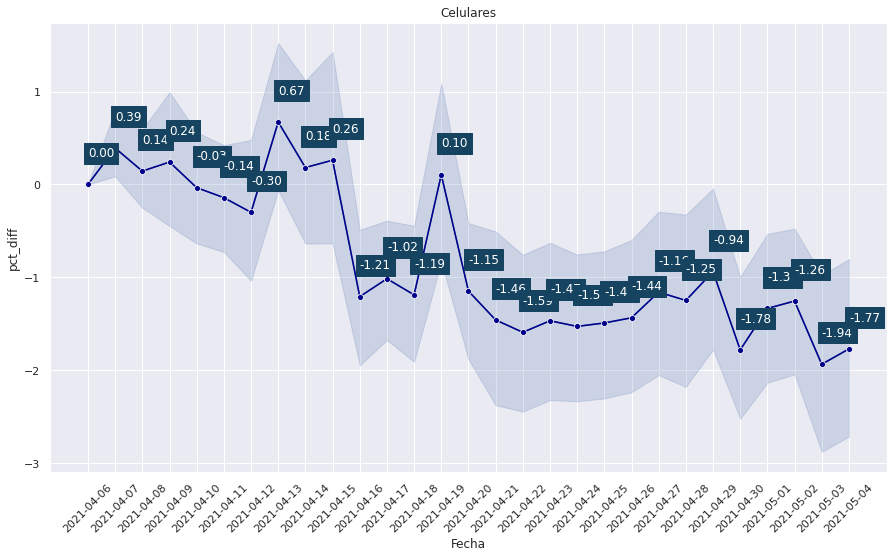

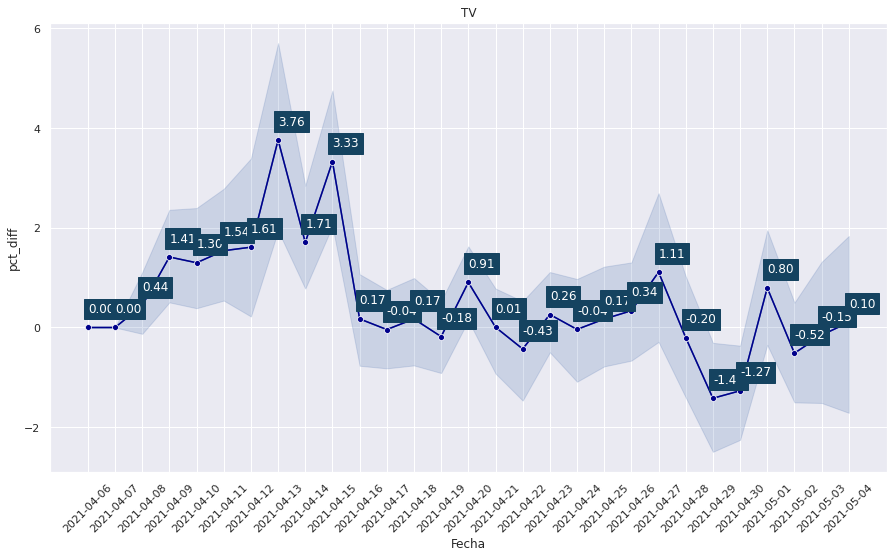

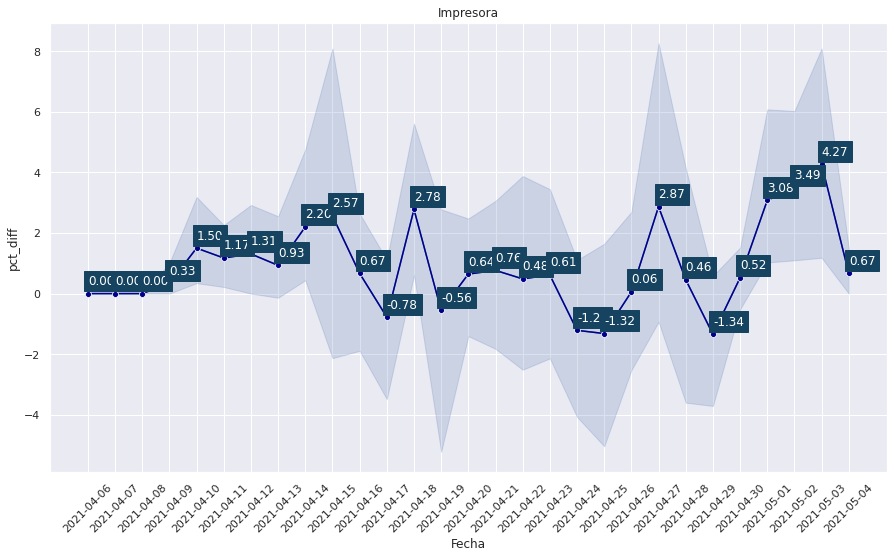

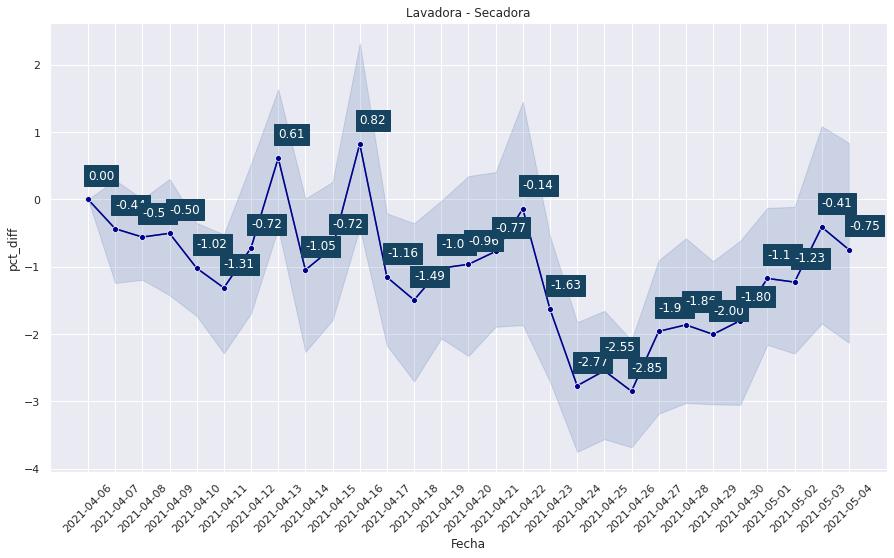

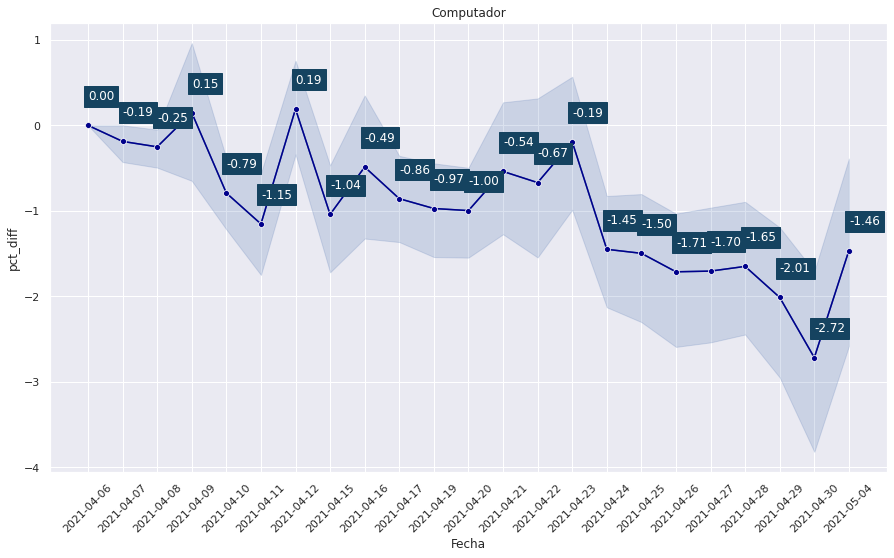

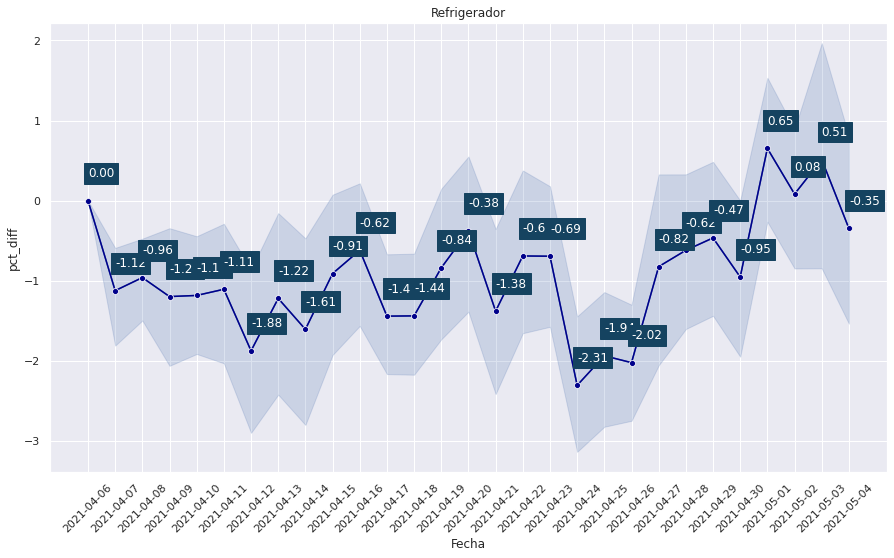

In [ ]:
for p in productos:
  df4 = db_diff[p].groupby('Fecha', axis=0, as_index=False).mean()
  fig, ax = plt.subplots()

  sns.lineplot(data=db_diff[p], x='Fecha', y='pct_diff', sort=True, ax=ax)
  sns.lineplot(data=df4, x='Fecha', y='pct_diff', ax=ax, color='darkblue', marker="o")
  plt.xticks(rotation=45)
  plt.title(p)
  # label points on the plot
  for x, y in zip(df4['Fecha'], df4['pct_diff']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y+0.3, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.2f}'.format(y), # data label, formatted to ignore decimals
    color = 'white').set_backgroundcolor('#154360') # set colour of line
  
  plt.show()


  #x = sns.lineplot(data=db_diff[p], x='Fecha', y='pct_diff', sort=True)
  #x.set_title(p)
  #x.set_ylabel('Variación porcentual')
  
  
  

In [ ]:
fecha = '2021-04-06'
db_diff_cel = pct_diff(db['Celulares'], fecha)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



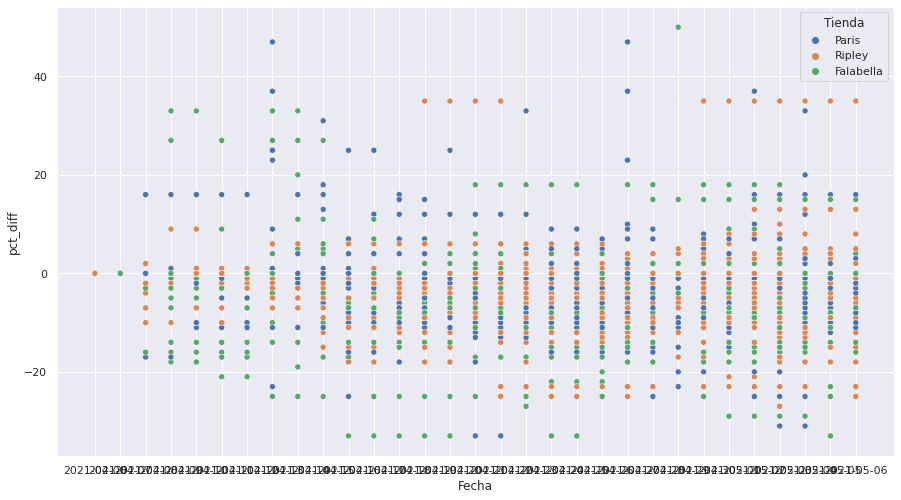

In [ ]:
db_diff_cel2 = db_diff_cel[db_diff_cel['Marca'].isin(['Apple', 'Motorola', 'Samsung'])]
sns.scatterplot(data=db_diff_cel2, x='Fecha', y='pct_diff', hue='Tienda')